### Exercise 2

In [457]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Question a)

### Definition of the constants

In [458]:
alpha = 0.8
q = 0.4
r = 0.1
T= 30
T1 = 10
T2 = 20
N=31

### Definition of the distributuion sigma and delta

In [459]:
mu1=0
mu2=0
sigma1=0.4
sigma2=0.1
delta = np.random.normal(mu1,sigma1,N)
epsilon=np.random.normal(mu2,sigma2,N)

### Data process

In [460]:
x= np.zeros(31)
x[0] = np.random.normal(0,1,1)
for i in range(1,len(x)):
    x[i] = alpha*x[i-1]+delta[i]

### Data model

In [461]:
h=[1,0.1,1]
def F(l1):
    y1 = np.zeros((l1,1))
    for i in range(l1-1):
        y1[i] = h[0]*x[i] + epsilon[i]
    return y1

In [462]:
def F1(l2):
    y2 = np.zeros((l2,1))
    for i in range (l2-1):
        y2[i] = h[2]*x[i] + epsilon[i]
    return y2

In [463]:
def F2(l3):
    y3 = np.zeros((l3,1))
    for i in range (l2-1):
        y3[i] = h[2]*x[i] + epsilon[i]
    return y2

In [464]:
l1 = len(np.linspace(0,10,11))
l2 = len(np.linspace(11,20,10))
l3 = len(np.linspace(21,30,10))

In [465]:
R1 = F(l1)
R2 = F(l2)
R3 = F(l3)
R = np.concatenate((R1,R2,R3), axis = 0)

$\textbf{Extraction of the values of R depending on the values of h}$

In [466]:
R11=R[0:11,:]
R22=R[11:21,:]
R33=R[21:31,:]

#### Plotting

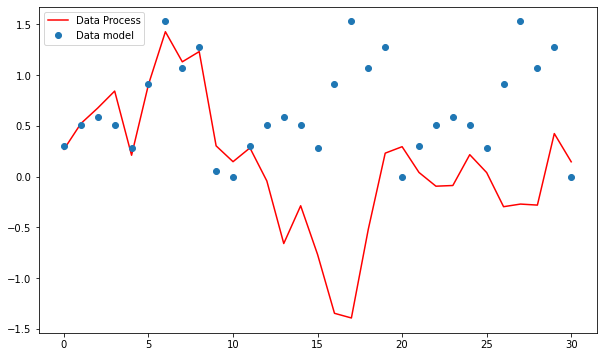

In [467]:
plt.figure(figsize=(10,6))
plt.plot(x,'r', label ='Data Process')
plt.plot(R, 'o', label = 'Data model')
plt.legend()

# Kalman Filter Question b)

In [468]:
sigma = np.zeros((l1+1,1))
mu = np.zeros((l1,1))
mu1 = np.zeros((l1+1,1))
mu1[0] = 0
sigma11 = np.zeros((l1,1))
sigma[0] = 1
h = [1,0.1,1]
mu[0] = 0
for i in range (1,l1+1):
    mu[i-1] = alpha*mu1[i-1]
    sigma11[i-1] = q**2 + alpha**2*sigma[i-1]
    K = sigma11[i-1]*h[0]*((h[0]*sigma11[i-1]*h[0] + r**2))**-1
    mu1[i] = mu[i-1] + K*(R11[i-1] - h[0]*mu[i-1])
    sigma[i] = (1-K*h[0])*sigma11[i-1]

In [469]:
sigma2 = np.zeros((l2+1,1))
muu = np.zeros((l2,1))
mu2 = np.zeros((l2+1,1))
sigma22 = np.zeros((l2,1))
sigma2[0] = 1
mu2[0] = 0

for i in range (1,l2+1):
    muu[i-1] = alpha*mu2[i-1]
    sigma22[i-1] = q**2 + alpha**2*sigma2[i-1]
    K2= sigma22[i-1]*h[1]*((h[1]*sigma22[i-1]*h[1] + r**2))**-1
    mu2[i] = muu[i-1] + K2*(R22[i-1] - h[0]*muu[i-1])
    sigma2[i] = (1-K2*h[1])*sigma22[i-1]

In [470]:
sigma3 = np.zeros((l3+1,1))
muuu = np.zeros((l3,1))
mu3 = np.zeros((l3+1,1))
sigma33 = np.zeros((l3,1))
mu3[0] = 0
sigma3[0] = 1

for i in range (1,l3+1):
    muuu[i-1] = alpha*mu3[i-1]
    sigma33[i-1] = q**2 + alpha**2*sigma3[i-1]
    K3= sigma33[i-1]*h[2]*((h[2]*sigma33[i-1]*h[2] + r**2))**-1
    mu3[i] = muuu[i-1] + K3*(R33[i-1] - h[2]*muuu[i-1])
    sigma3[i] = (1-K3*h[2])*sigma33[i-1]

In [471]:
sigma_T = np.concatenate((sigma,sigma2,sigma3), axis=0)
mu_T = np.concatenate((mu,mu2,mu3), axis=0)
muu_T =np.concatenate((mu,muu,muuu), axis=0)
sigmaa_T = np.concatenate((sigma11,sigma22,sigma33), axis=0)

In [472]:
xfil = np.zeros(31)
xfor = np.zeros(31)
for i in range (31):
    xfil[i] = np.random.normal(mu_T[i],np.sqrt(sigma_T[i]))
    xfor[i] = np.random.normal(muu_T[i],np.sqrt(sigmaa_T[i]))

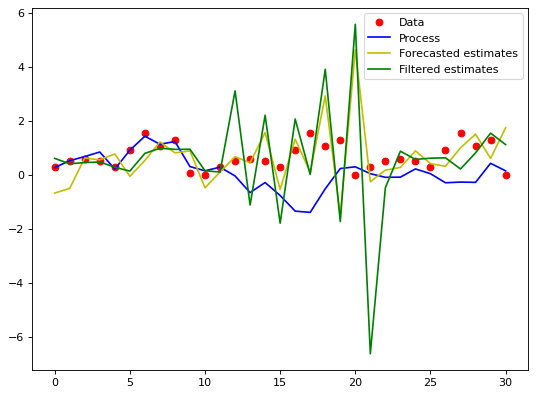

In [473]:
plt.figure(figsize=(8,6), dpi = 80)
plt.plot(R,'o', label = 'Data', color='red')
plt.plot(x,label = 'Process', color ='blue')
plt.plot(xfor, label = 'Forecasted estimates', color ='y')
plt.plot(xfil, label = 'Filtered estimates', color='green')
plt.legend()
plt.show()

From the above plot, many observations can be done:

- At the beginning of the measurement period, the filtered estimates aligns well with the one containing the errors. However, from period T = 10 up to the period T = 23, there is a large gap between the two. Those gaps are errors between the process model and the filtering.

- We can also notice that the errors between the filtered and the forecasted estimates is smaller than the errors between the process data and the forecasted estimates. The forecasted and the filtered estimates follow the same path. They are even superposed together at some given periods.

# Question c) Errors

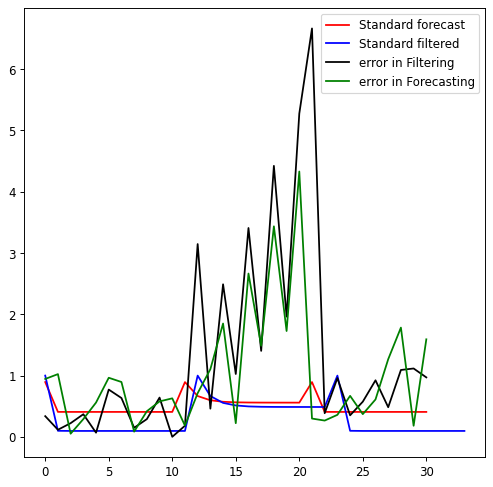

In [474]:
plt.figure(figsize=(7,7), dpi = 85)
plt.plot(np.sqrt(sigmaa_T),label='Standard forecast',color='red') 
plt.plot(np.sqrt(sigma_T),label='Standard filtered',color='blue')
plt.plot(abs(xfil-x),label='error in Filtering',color ='black')
plt.plot(abs(xfor-x),label='error in Forecasting',color ='green')
plt.legend()
plt.show()

From this figure, we can notice that the uncertainties in the forecasted estimates ($\textbf{red curve}$) is greater than the uncertainties in the filtered estimates ($\textbf{blue curve}$)

# Exercise 3

## Question a)

In [475]:
alpha_1 = 0.9
q_1 = 0.001
r_1 = 0.05
N =31

In [476]:
mu1=0
mu2=0
sigma_d=q_1
sigma_ep=r_1
delta1 = np.random.normal(mu1,sigma_d,N)
epsilon1=np.random.normal(mu2,sigma_ep,N)

## Non linear process model

In [477]:
x = np.zeros(N)
x[0] = np.random.normal(0.1, 0.01, 1)
for i in range (1,N):
    x[i] = alpha*x[i-1]*(1-x[i-1]) + delta1[i]
x

array([ 0.10981802,  0.07902061,  0.05734803,  0.0429595 ,  0.03401135,
        0.02520241,  0.0202592 ,  0.01695833,  0.01199986,  0.01103983,
        0.00665758,  0.00622972,  0.00441103,  0.0059323 ,  0.00621502,
        0.00471186,  0.00262721,  0.00253183,  0.00081858,  0.00152874,
        0.00218252,  0.00152236,  0.00351238,  0.00447224,  0.00524626,
        0.00447971,  0.0046811 ,  0.0034823 ,  0.00240684,  0.0003475 ,
       -0.0001622 ])

## Data model

In [478]:
y = np.zeros(N)
for i in range (1,N):
    y[i] = x[1] + epsilon[i]
y

array([ 0.        ,  0.06487364, -0.01072158, -0.25436843,  0.14830173,
        0.08620605,  0.17990602,  0.01746188,  0.12706272, -0.16734774,
        0.09180929,  0.19108715,  0.11029566,  0.09884694,  0.09351778,
        0.17845579,  0.20255751, -0.07254024,  0.11996896,  0.0723307 ,
        0.07711362,  0.06498027,  0.00334021, -0.17775729,  0.12830862,
        0.15483222,  0.06377164,  0.18243965,  0.03915046,  0.28079797,
        0.14996663])

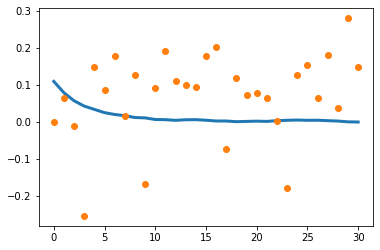

In [479]:
plt.plot(x, label='Process model', linewidth = 3)
plt.plot(y,'o', label = 'Data model')

## Tangent linear operator

In [480]:
M = np.zeros((31,1))
for i in range (31):
    M[i] = alpha_1*(1-2*x[i-1])

## Extended Kalman

In [481]:
sigma = np.zeros((N+1,1))
mu = np.zeros((N,1))
mu1 = np.zeros((N+1,1))
mu1[0] = 0
sigma11 = np.zeros((N,1))
sigma[0] = 0.01
h=1
mu[0] = 0.1
for i in range (1,N+1):
    mu[i-1] = alpha_1*mu1[i-1]
    sigma11[i-1] = q_1**2 + ((M[i-1])**2*sigma[i-1])
    K = sigma11[i-1]*h*((sigma11[i-1]*h + r_1**2))**-1
    mu1[i] = mu[i-1] + K*(y[i-1] - h*mu[i-1])
    sigma[i] = (1-K*h)*sigma11[i-1]

## Filtered and forecast estimates

In [482]:
xfil = np.zeros(31)
xfor = np.zeros(31)
for i in range (31):
    xfil[i] = np.random.normal(mu1[i],np.sqrt(sigma[i]))
    xfor[i] = np.random.normal(mu[i],np.sqrt(sigma11[i]))

In [483]:
xfil

array([ 3.19416776e-02,  4.33774812e-02,  6.96284054e-02,  6.63802221e-02,
       -3.69614667e-03,  6.18273722e-03, -2.27800320e-03,  8.13381314e-03,
        9.79699132e-03,  1.79970066e-02, -3.70611201e-03,  1.01583419e-02,
        8.08842967e-03,  7.89814365e-03,  8.49427824e-03,  6.62128562e-03,
        2.33357030e-03,  3.84950950e-03,  8.20836069e-03,  6.16804662e-03,
        4.81384110e-03,  2.39792688e-03,  6.35063700e-03,  1.30090229e-03,
        3.73844429e-03,  5.83205195e-04,  6.26994708e-03,  1.83497873e-03,
        8.95228721e-04,  1.22653628e-03, -8.56670612e-05])

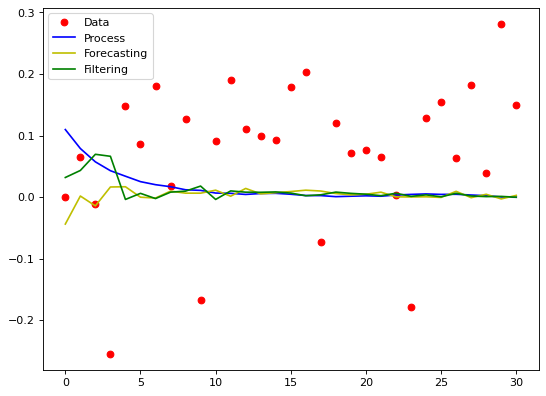

In [484]:
plt.figure(figsize=(8,6), dpi = 80)
plt.plot(y,'o', label = 'Data', color='red')
plt.plot(x,label = 'Process', color ='blue')
plt.plot(xfor, label = 'Forecasting', color ='y')
plt.plot(xfil, label = 'Filtering', color='green')
plt.legend()
plt.show()

From the above plot, many observations can be done:

- At the beginning of the measurement period, certain data points of the data process fit well with the filtered estimates. Thenafter, it deviates completely fom what the data process show us. The gap between the two is very large therefore the error is significant.

- We can also notice that the errors between the filtered and the forecasted estimates is smaller than the errors between the process data and the forecasted estimates. The forecasted and the filtered estimates follow the same path. They are even superposed together at some given periods.

## Errors

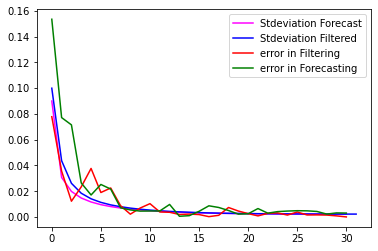

In [485]:
plt.plot(np.sqrt(sigma11),label='Stdeviation Forecast',color ='magenta')
plt.plot(np.sqrt(sigma),label='Stdeviation Filtered',color ='blue')
plt.plot(abs(xfil-x),label='error in Filtering',color ='red')
plt.plot(abs(xfor-x),label='error in Forecasting',color ='green')
plt.legend()
plt.show()

From this figure, we can notice that the uncertainties in the forecasted estimates ($\textbf{magneta curve}$) is less than the uncertainties in the filtered estimates ($\textbf{blue curve}$)